In [311]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler 

In [312]:
df= pd.read_csv('C:/Users/91637/OneDrive/Desktop/EXCELAR ASSIGNMENT/6 MLR/ToyotaCorolla - MLR.csv')

In [313]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


### EDA

In [314]:
df.shape

(1436, 11)

In [315]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [316]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [317]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [318]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])



In [319]:
df['Cylinders'].value_counts()

Cylinders
4    1436
Name: count, dtype: int64

<Axes: >

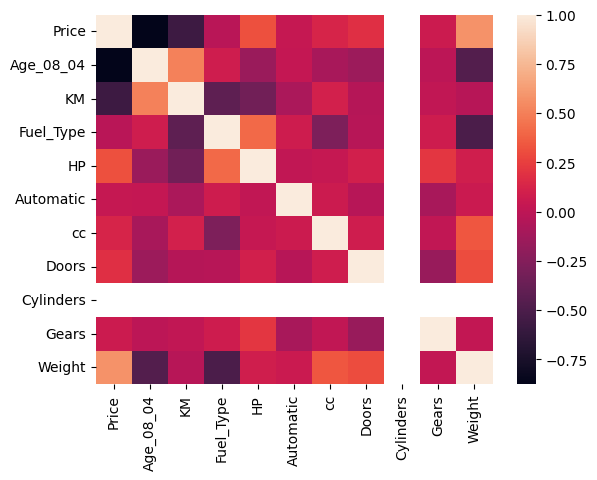

In [320]:
sns.heatmap(df.corr())

In [321]:
df.corr()['Price']

Price        1.000000
Age_08_04   -0.876590
KM          -0.569960
Fuel_Type   -0.022157
HP           0.314990
Automatic    0.033081
cc           0.126389
Doors        0.185326
Cylinders         NaN
Gears        0.063104
Weight       0.581198
Name: Price, dtype: float64

#### Checking Outliers

In [322]:
outlier_cols = []

for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - (1.5 * IQR)
    higher = q3 + (1.5 * IQR)  

    # Check for outliers
    outliers = df[(df[i] < lower) | (df[i] > higher)][i]

    if not outliers.empty:
        outlier_cols.append(i)
        print('Column_Name :', i, '|', 'Lower_bound :', lower, '|', 'Higher_bound :', higher)
        print()
        print('All The Outlier Values : \n\n', outliers.values)
        print()
        print()
        print('-' * 90)
        

print("Columns with outliers:", outlier_cols)


Column_Name : Price | Lower_bound : 3200.0 | Higher_bound : 17200.0

All The Outlier Values : 

 [18600 21500 20950 19950 19600 21500 22500 22000 22750 17950 17495 17950
 19000 17950 17950 21950 17950 20500 21950 18950 18750 17950 17950 18950
 22250 18950 19950 18750 18450 18950 17250 17950 17450 17950 21950 22250
 19950 18900 19950 18750 17450 18990 18500 18500 19450 18800 17450 17950
 32500 31000 31275 24950 24950 22950 24990 21950 17900 19250 22250 18950
 19950 18950 21750 17950 18450 23000 19900 23950 19950 18500 18950 20500
 24500 19450 20950 19950 18450 19500 21750 19500 18900 19750 19750 18950
 20750 19600 19500 17650 19950 19950 20950 20500 17795 18245 23750 19500
 18950 21950 19950 18950 19950 21950 22500 18500 18700 21125 21500 17795
 18245 18950]


------------------------------------------------------------------------------------------
Column_Name : Age_08_04 | Lower_bound : 5.0 | Higher_bound : 109.0

All The Outlier Values : 

 [4 4 4 2 2 1 1]


-------------------------

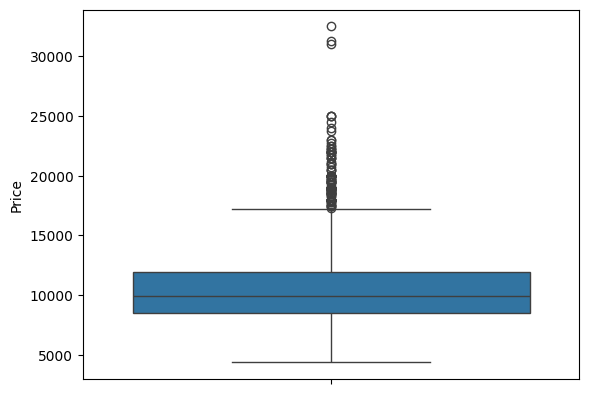

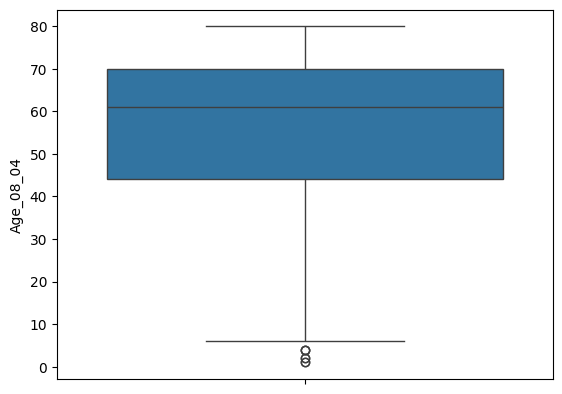

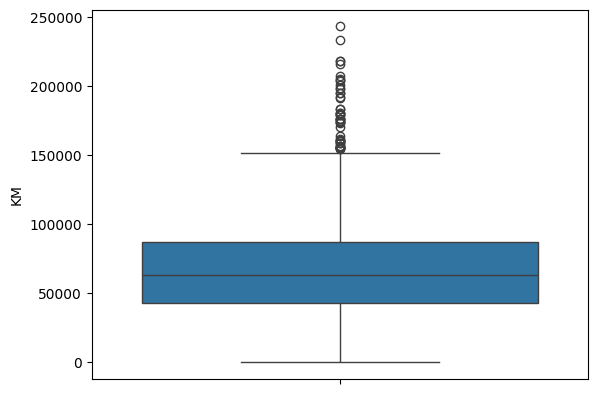

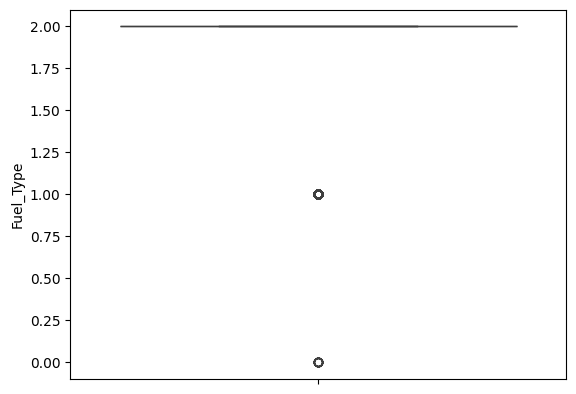

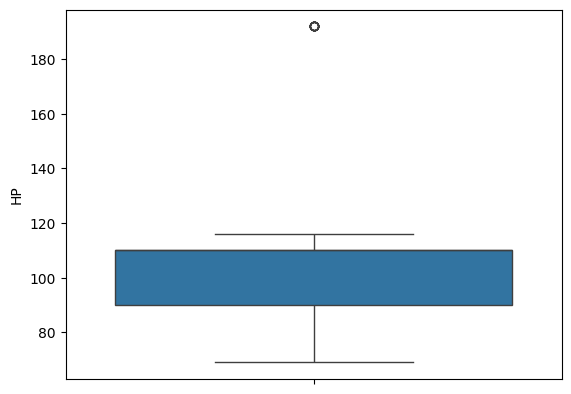

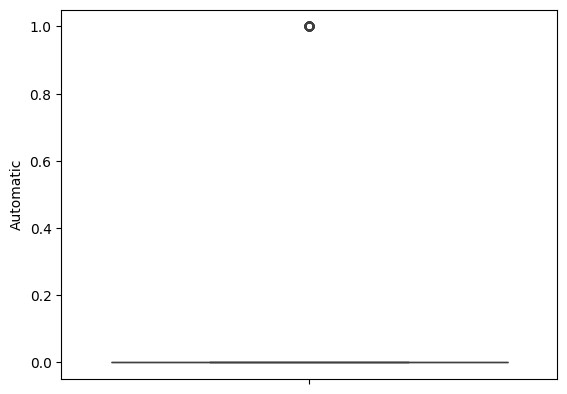

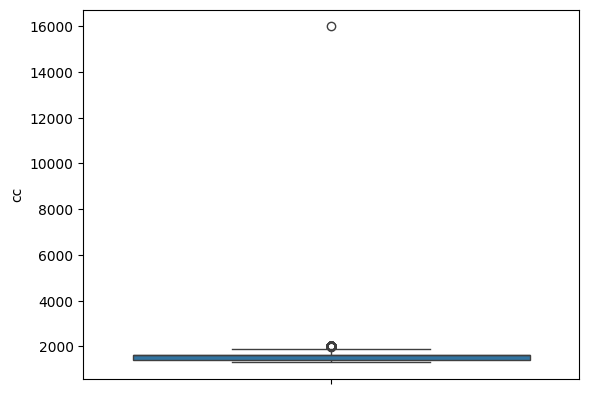

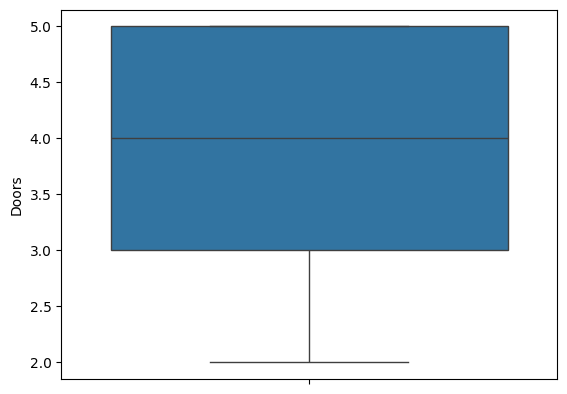

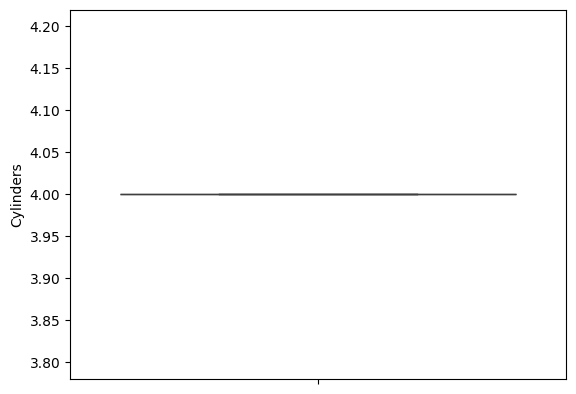

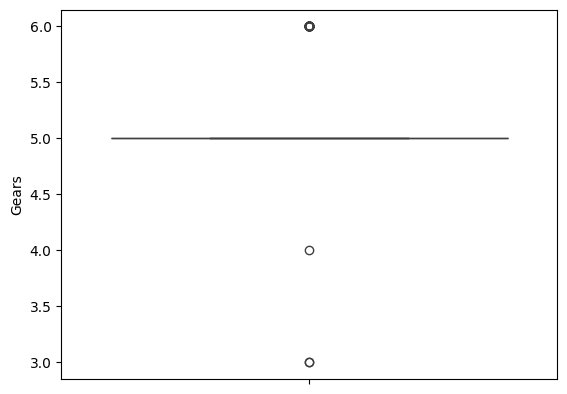

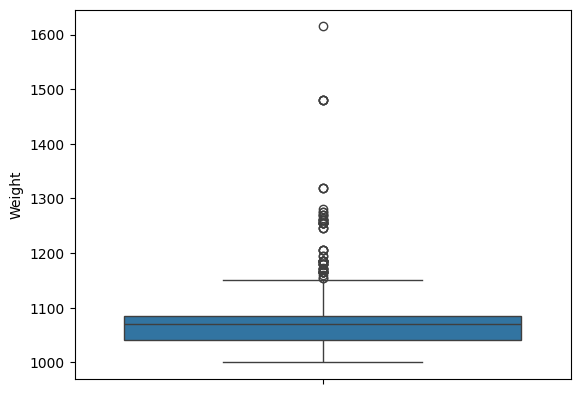

In [323]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

### Base Model With Out Feature Selection And Normalization

In [324]:
X=df.drop("Price", axis=1)
Y=df['Price']


In [325]:
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [326]:
model=LinearRegression()

In [327]:
model.fit(X_train,y_train)

LinearRegression()

I use Mean absolute Error Becuse I we are Predicting the price Of the Car

In [328]:
predict=model.predict(X_test)
R2_Score_Base=r2_score(y_test, predict)
Mae_model_Base=mean_absolute_error(y_test, predict)

print("R2 Score Of The Base Model",r2_score(y_test, predict))
print('Mean Absolute Error',mean_absolute_error(y_test, predict))

R2 Score Of The Base Model 0.8428476112018
Mean Absolute Error 992.8982858371411


### Model With Normalizing the Value


In [329]:
X=df.drop("Price", axis=1)
Y=df['Price']

In [330]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [331]:
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [332]:
model_norm=LinearRegression()


In [333]:
model_norm.fit(X_train_scaled,y_train)


LinearRegression()

In [334]:
predict=model_norm.predict(X_test_scaled)
R2_Score_model_norm=r2_score(y_test, predict)
Mae_model_norm=mean_absolute_error(y_test, predict)

print("R2 Score Of The Base Model",r2_score(y_test, predict))
print('Mean Absolute Error',mean_absolute_error(y_test, predict))

R2 Score Of The Base Model 0.8428476112018002
Mean Absolute Error 992.8982858371453


In [335]:
model.coef_

array([-1.21436240e+02, -1.69355966e-02,  8.62056431e+02,  2.06582831e+01,
        2.45196891e+02, -7.35153881e-02, -3.62796477e+01,  4.54747351e-13,
        5.30282040e+02,  2.35106426e+01])

In [336]:
model.intercept_

np.float64(-12636.278112384636)

### Model With Feature Selection And Normalization


In [337]:
df.corr()['Price']

Price        1.000000
Age_08_04   -0.876590
KM          -0.569960
Fuel_Type   -0.022157
HP           0.314990
Automatic    0.033081
cc           0.126389
Doors        0.185326
Cylinders         NaN
Gears        0.063104
Weight       0.581198
Name: Price, dtype: float64

In [338]:
from sklearn.ensemble import RandomForestRegressor
fr_imp_model=RandomForestRegressor()
fr_imp_model.fit(X_train_scaled_full,y_train)

RandomForestRegressor()

In [339]:
fr_imp_model.feature_importances_

array([8.42526941e-01, 6.63151639e-02, 2.45737329e-03, 1.40791592e-02,
       8.55168937e-04, 4.27858211e-03, 5.07792583e-03, 0.00000000e+00,
       7.14784827e-04, 6.36949013e-02])

In [340]:
new_df = df.drop(['Fuel_Type', 'Cylinders'], axis=1)


In [341]:
new_df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,90,0,2000,3,5,1165
1,13750,23,72937,90,0,2000,3,5,1165
2,13950,24,41711,90,0,2000,3,5,1165
3,14950,26,48000,90,0,2000,3,5,1165
4,13750,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025
1432,10845,72,19000,86,0,1300,3,5,1015
1433,8500,71,17016,86,0,1300,3,5,1015
1434,7250,70,16916,86,0,1300,3,5,1015


In [342]:
X=new_df.drop("Price", axis=1)
Y=new_df['Price']

In [343]:
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [344]:
model_norm_fr_sl=LinearRegression()

In [345]:
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [346]:
model_norm_fr_sl.fit(X_train_scaled,y_train)

LinearRegression()

In [347]:
predict=model_norm_fr_sl.predict(X_test_scaled)

R2_Score_model_norm_fr_sl=r2_score(y_test, predict)
Mae_model_norm_fr_sl=mean_absolute_error(y_test, predict)

print("R2 Score Of The Base Model",r2_score(y_test, predict))
print('Mean Absolute Error',mean_absolute_error(y_test, predict))  

R2 Score Of The Base Model 0.852345214190885
Mean Absolute Error 997.002405725814


### Apply Ridege And Lasso

In [348]:
from sklearn.linear_model import Ridge,Lasso

In [349]:
ridege=Ridge()
lasso=Lasso()

In [350]:
ridege.fit(X_train_scaled,y_train)
 

Ridge()

In [351]:
predict = ridege.predict(X_test_scaled)

R2_Score_Ridge=r2_score(y_test, predict)
Mae_Ridge=mean_absolute_error(y_test, predict)

print("R2 Score ", r2_score(y_test, predict))
print('Mean Absolute Error', mean_absolute_error(y_test, predict))


R2 Score  0.8523282499142726
Mean Absolute Error 996.9307967098653


In [352]:
lasso.fit(X_train_scaled,y_train)

Lasso()

In [358]:
predict = lasso.predict(X_test_scaled)
R2_Score_Lasso=r2_score(y_test, predict)
Mae_Lasso=mean_absolute_error(y_test, predict)
print("R2 Score ", r2_score(y_test, predict))
print('Mean Absolute Error', mean_absolute_error(y_test, predict))

R2 Score  0.8523751370088543
Mean Absolute Error 996.887763844908


In [360]:
print('Base Model :', "R2 Score :",R2_Score_Base ,'MAE :', Mae_model_Base)
print()
print('Normalize Data then Create  Model :', "R2 Score :",R2_Score_model_norm ,'MAE :', Mae_model_norm)
print()
print('Normalize Data  and Feature Selection  Model :', "R2 Score :",R2_Score_model_norm_fr_sl ,'MAE :', Mae_model_norm_fr_sl)
print()
print('Normalize Data  and Feature Selection  Lasso Model :', "R2 Score :",R2_Score_Lasso ,'MAE :', Mae_Lasso)
print()
print('Normalize Data  and Feature Selection  Ridge Model :', "R2 Score :",R2_Score_Ridge ,'MAE :', Mae_Ridge)

Base Model : R2 Score : 0.8428476112018 MAE : 992.8982858371411

Normalize Data then Create  Model : R2 Score : 0.8428476112018002 MAE : 992.8982858371453

Normalize Data  and Feature Selection  Model : R2 Score : 0.852345214190885 MAE : 997.002405725814

Normalize Data  and Feature Selection  Lasso Model : R2 Score : 0.8523751370088543 MAE : 996.887763844908

Normalize Data  and Feature Selection  Ridge Model : R2 Score : 0.8523282499142726 MAE : 996.9307967098653
